For this example, we’ll use the COVID-19 dataset from Johns Hopkins University, which includes information on confirmed cases, deaths, and recoveries.

# Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore')

# Step 2: Load the Dataset
You can download the dataset from Johns Hopkins University’s GitHub repository.

In [2]:
# Load the COVID-19 dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(url)


Step 3: Data Overview

In [3]:
# Display the first few rows of the dataset
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


# Step 4: Data Preprocessing
Let’s preprocess the data to make it suitable for analysis.

In [4]:
# Melt the dataset to have a long format
covid_data_melted = covid_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                                    var_name='Date', 
                                    value_name='Confirmed')
# Convert the 'Date' column to datetime format
covid_data_melted['Date'] = pd.to_datetime(covid_data_melted['Date'])

# Step 5: Visualize the Data
We’ll create a few visualizations to understand the spread of COVID-19.

1. Global Trend of Confirmed Cases

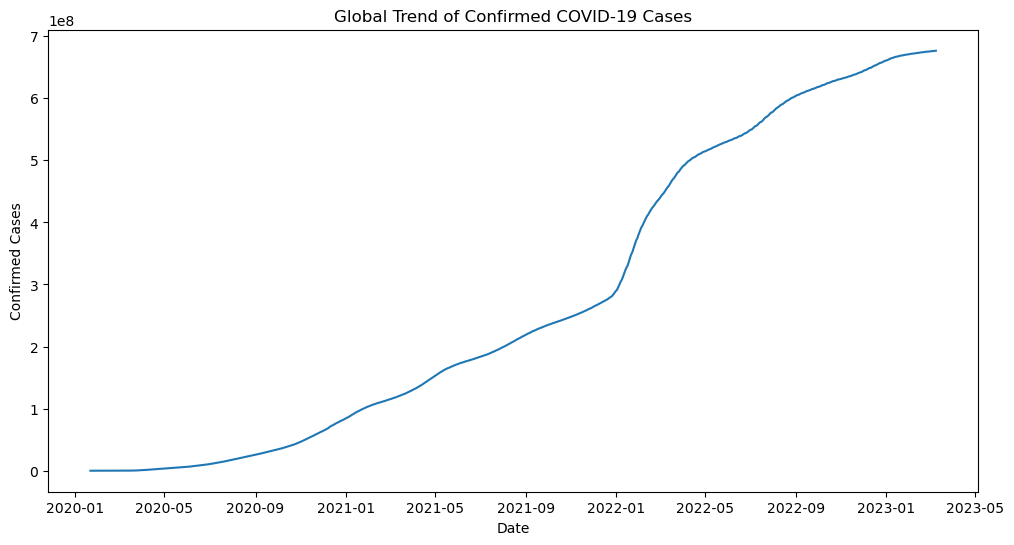

In [5]:
# Group by date and sum the confirmed cases
global_trend = covid_data_melted.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_trend)
plt.title('Global Trend of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

2. Top 10 Countries with the Most Confirmed Cases

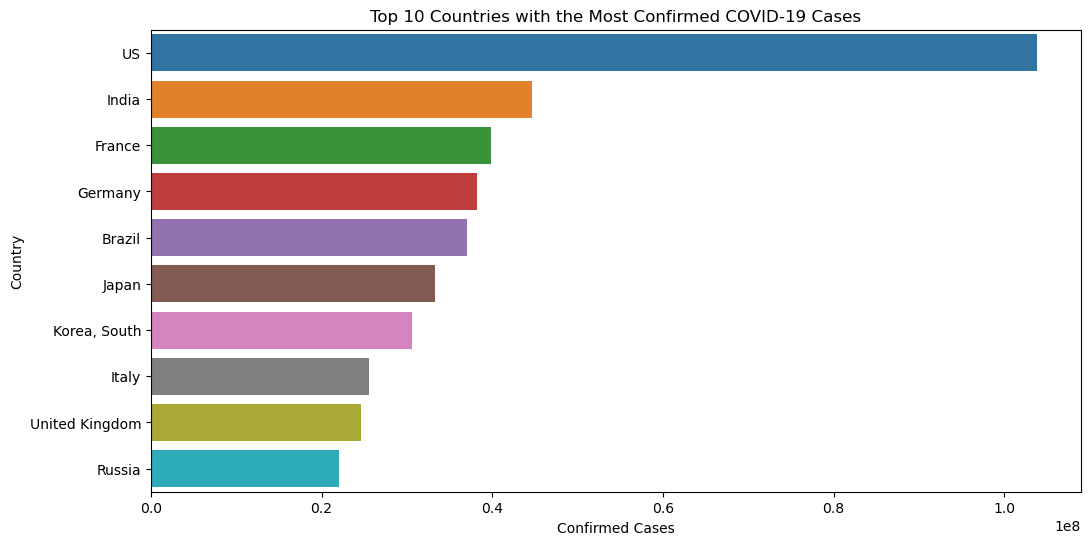

In [6]:
# Get the latest date's data
latest_data = covid_data_melted[covid_data_melted['Date'] == covid_data_melted['Date'].max()]

# Group by country and sum the confirmed cases
country_data = latest_data.groupby('Country/Region')['Confirmed'].sum().reset_index()

# Get the top 10 countries
top_10_countries = country_data.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries)
plt.title('Top 10 Countries with the Most Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

Step 6: Interpret the Visualizations
Global Trend of Confirmed Cases: The line plot shows the cumulative number of confirmed COVID-19 cases over time, highlighting the global spread of the virus.
Top 10 Countries with the Most Confirmed Cases: The bar plot identifies the countries with the highest number of confirmed cases, providing insights into the regions most affected by the pandemic.
These visualizations help us understand the overall impact of COVID-19 and identify key trends and hotspots.

In [7]:
# Load the COVID-19 deaths dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths_data = pd.read_csv(url)


In [8]:
# Display the first few rows of the dataset
print(covid_deaths_data.head())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896   

In [9]:
# Filter data for Germany
germany_deaths_data = covid_deaths_data[covid_deaths_data['Country/Region'] == 'Germany']

# Drop unnecessary columns
germany_deaths_data = germany_deaths_data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

# Transpose the dataframe
germany_deaths_data = germany_deaths_data.T

# Rename the column
germany_deaths_data.columns = ['Deaths']

# Convert the index to datetime
germany_deaths_data.index = pd.to_datetime(germany_deaths_data.index)


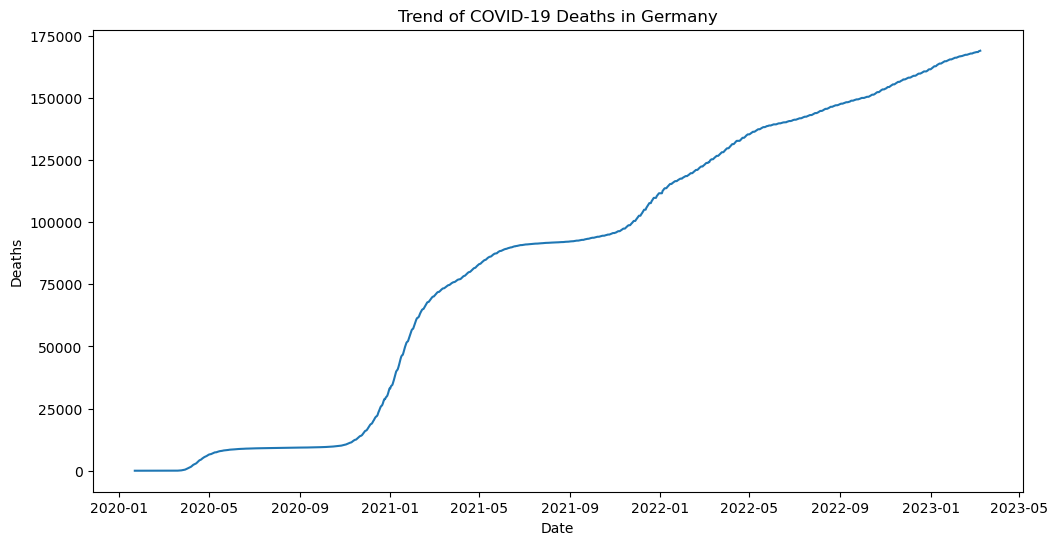

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=germany_deaths_data, x=germany_deaths_data.index, y='Deaths')
plt.title('Trend of COVID-19 Deaths in Germany')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()


Step 6: Interpret the Visualization
The line plot shows the cumulative number of COVID-19 deaths in Germany over time. This visualization helps us understand the progression of the pandemic’s impact in terms of fatalities.

In [11]:
# Load the COVID-19 deaths dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths_data = pd.read_csv(url)


In [12]:
pd.option_context('mode.use_inf_as_na', True)
# List of countries to compare
countries = ['Germany', 'Italy', 'France', 'Spain', 'United Kingdom']

# Filter data for the selected countries
filtered_data = covid_deaths_data[covid_deaths_data['Country/Region'].isin(countries)]

# Drop unnecessary columns
filtered_data = filtered_data.drop(columns=['Province/State', 'Lat', 'Long'])

# Transpose the dataframe
filtered_data = filtered_data.set_index('Country/Region').T

# Convert the index to datetime with a specified format
filtered_data.index = pd.to_datetime(filtered_data.index, format='%m/%d/%y')

# Convert infinite values to NaN
filtered_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

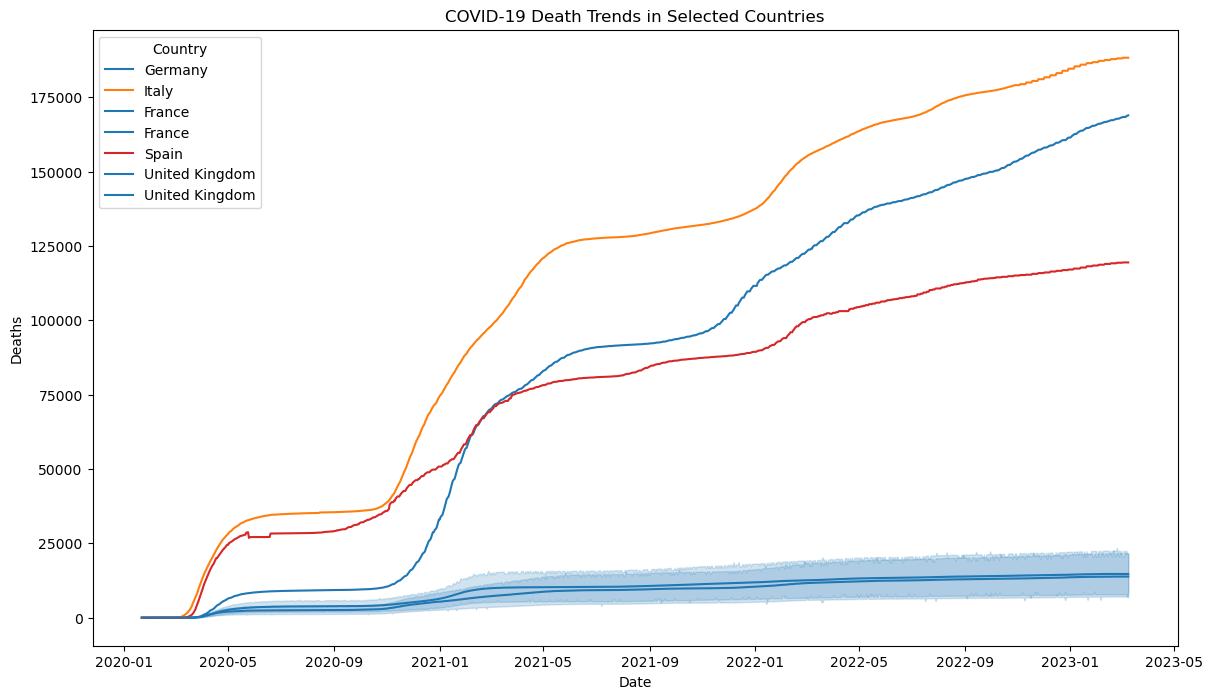

In [13]:
pd.option_context('mode.use_inf_as_na', True)

plt.figure(figsize=(14, 8))
for country in countries:
    sns.lineplot(data=filtered_data[country], label=country)

plt.title('COVID-19 Death Trends in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend(title='Country')
plt.show()


Step 5: Interpret the Visualization
The line plot shows the cumulative number of COVID-19 deaths in Germany, Italy, France, Spain, and the United Kingdom over time. This visualization helps us compare the impact of the pandemic across these countries.